<a href="https://colab.research.google.com/github/Pusparghya/HelloWorld/blob/main/To_explore_Business_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#Import required libraries
import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
uploaded = files.upload()

Saving SampleSuperstore (1).csv to SampleSuperstore (1) (1).csv


In [26]:
#Load Datasets
df = pd.read_csv('SampleSuperstore (1).csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [27]:
#To check shape of data
df.shape

(9994, 13)

In [28]:
#To remove Country coloumn
df1 = df.drop(['Country'], axis=1)

In [29]:
#After removing Country
df1.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [30]:
#To check null values
df1.isnull().sum()

Ship Mode       0
Segment         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [31]:
#Information about data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Postal Code   9994 non-null   int64  
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 937.1+ KB


In [32]:
#To describe data
df1.describe ()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [33]:
#To check Ship mode types
df1['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

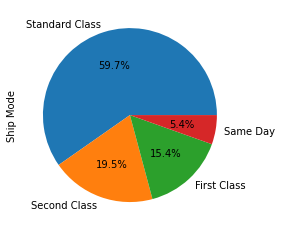

In [34]:
#To make pie chart of ship mode
df1['Ship Mode'].value_counts().plot.pie(autopct="%1.1f%%")

In [35]:
#To see sub-category wise distribution
df1['Sub-Category'].value_counts(sort=False)

Phones          889
Chairs          617
Tables          319
Fasteners       217
Supplies        190
Bookcases       228
Machines        115
Art             796
Paper          1370
Appliances      466
Copiers          68
Storage         846
Envelopes       254
Accessories     775
Binders        1523
Furnishings     957
Labels          364
Name: Sub-Category, dtype: int64

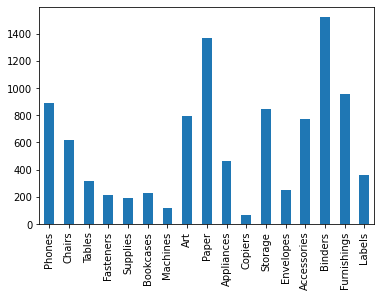

In [36]:
df1['Sub-Category'].value_counts(sort=False).plot(kind="bar")

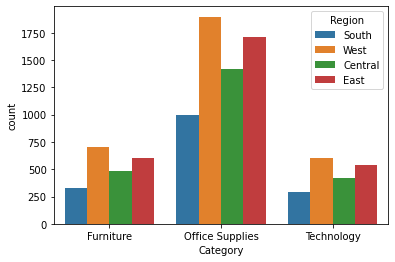

In [39]:
#To see Category-wise distribution of various regions
sns.countplot(x="Category", hue="Region", data=df1)

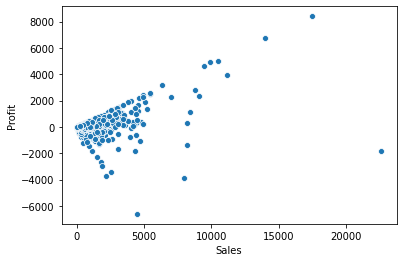

In [40]:
#We can draw scatterplot of sales and profit
sns.scatterplot("Sales",'Profit',data=df1)

In [41]:
#Top profitable cities
top=df1.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
top

,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
...,...,...
80,Chicago,-6654.5688
241,Lancaster,-7239.0684
434,San Antonio,-7299.0502
207,Houston,-10153.5485


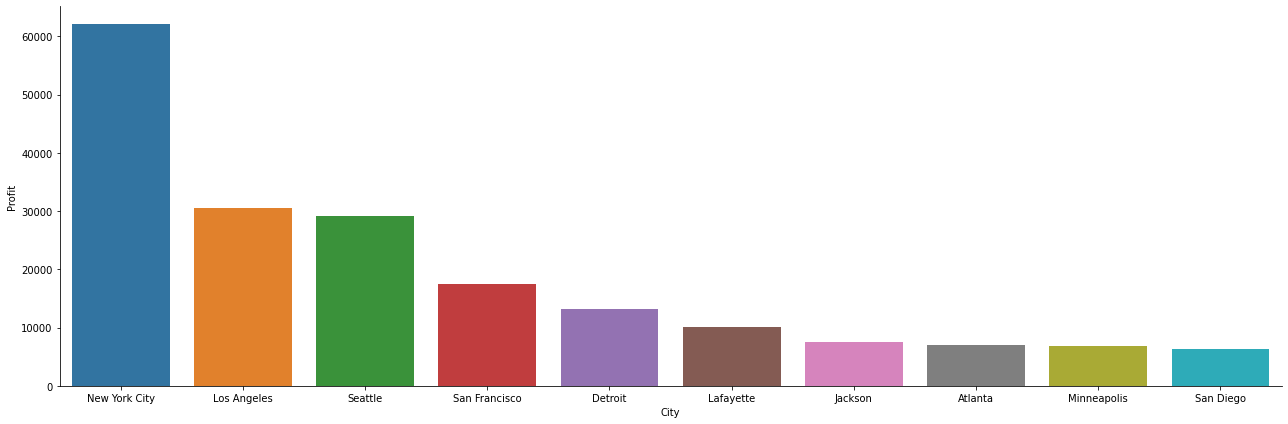

In [42]:
sns.catplot('City','Profit',data=top.head(10),kind='bar',height=6,aspect=3)
plt.show()

In [44]:
#Top Profitable Sub-Category
top_category = df1.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
top_category

,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,34053.5693
3,Binders,30221.7633
5,Chairs,26590.1663
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13059.1436
7,Envelopes,6964.1767


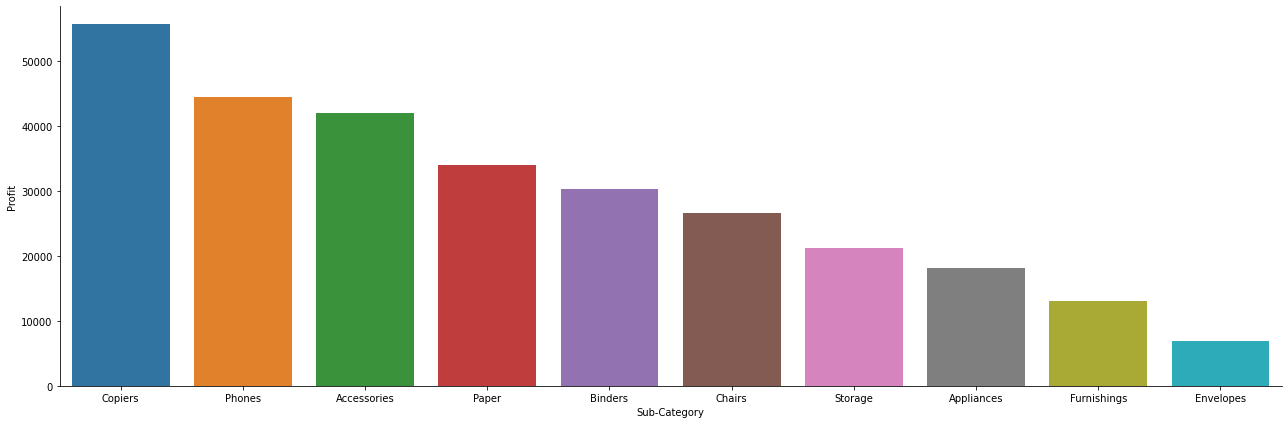

In [45]:
sns.catplot(x='Sub-Category',y='Profit',data=top_cat.head(10),kind='bar',height=6,aspect=3)